# Exploratory data analysis

## Training data

In [207]:
import pandas as pd

fname = '../../datasets/tiingo_tweets/all_tweets_headlines_17844.csv'  

df = pd.read_csv(fname)

print('\nshape = ',df.shape)

df.dropna(axis=0,how='any',inplace=True)

print('\nshape = ',df.shape)

print('\n',df.dtypes)

df['senti'] = df['senti'].astype('category')

print('\n',df.dtypes)

print('\n\tdf.shape = ',df.shape)

df.head()


shape =  (17844, 2)

shape =  (17844, 2)

 text     object
senti     int64
dtype: object

 text       object
senti    category
dtype: object

	df.shape =  (17844, 2)


,text,senti
0,$3.98 Billion in Sales Expected for Jacobs Eng...,1
1,"Operating result , excluding one-off items , t...",-1
2,"great app, better than Google's free one. but ...",0
3,said trump polit dive market spi nk,-1
4,qqq spi iwm spx rut,-1


In [208]:
print('Index unique ? ',df.index.is_unique)

if not df.index.is_unique:
 print('\nResetting')   
 df.reset_index(drop=True,inplace=True)
 print(df.index.is_unique)

df[df.index.duplicated(keep=False)]

Index unique ?  True


,text,senti


  1    5948
 0    5948
-1    5948
Name: senti, dtype: int64


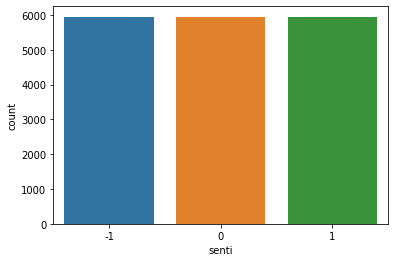

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

print('',df['senti'].value_counts())

plt.figure(1)
sns.countplot(df.senti)

plt.show()

## Drop tweets with more than 5 cashtags

In [210]:
import text_clean as tc
import importlib
importlib.reload(tc)

import text_clean as tc
import importlib
importlib.reload(tc)

cond = df['text'].apply(lambda x : tc.count_cashtags(x) > 5)

#cond.shape
df.drop(index=df[cond].index,inplace=True)

print(df.shape)

cond2 = df['text'].apply(lambda x : tc.count_cashtags(x) > 5)

print(cond2.shape)
cond2.value_counts()


Entered*** 

Entered*** 
(17627, 2)
(17627,)


False    17627
Name: text, dtype: int64

In [211]:
nrows = df.shape[0]
print('\nnrows = ',nrows)

df['tidy_text'] = df['text'].apply(lambda x : tc.clean_emoji_url(x))
df['tidy_text'] = df['tidy_text'].apply(lambda x : tc.remove_hashtag(x))
df['tidy_text'] = df['tidy_text'].apply(lambda x : tc.remove_cashtag(x))
df['tidy_text'] = df['tidy_text'].apply(lambda x : tc.remove_mention(x))
df['tidy_text'] = df['tidy_text'].apply(lambda x : tc.replace_chars(x))
df['tidy_text'] = df['tidy_text'].apply(lambda x : tc.normalize_doc(x))

print('\nDone cleaning')


nrows =  17627

Done cleaning


## Drop tweets/text with zero tokens

In [212]:
print(df.columns)

cond = df['tidy_text'].apply(lambda x : tc.count_toks(x) == 0)

print(cond.shape)
cond.value_counts()

df.drop(index=df[cond].index,inplace=True)
print(df.shape)

cond2 = df['tidy_text'].apply(lambda x : tc.count_toks(x) == 0)

print(cond2.shape)

cond2.value_counts()


Index(['text', 'senti', 'tidy_text'], dtype='object')
(17627,)
(17581, 3)
(17581,)


False    17581
Name: tidy_text, dtype: int64

In [213]:
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain

nrows = df.shape[0]

print('\nnrows = ',nrows)

all_words_toks = []

for ii in np.arange(nrows):
 txt = df.iloc[ii]['tidy_text']   
 all_words_toks.append(word_tokenize(txt))

flat_all_words = list(chain(*all_words_toks))


nrows =  17581



len(flat_all_words) =  210372

sum =  210372

100 most common words : 

 ('app', 'spi', 'use', 'task', 'eur', 'time', 'up', 'work', 'like', 'compani', 'day', 'one', 'list', 'year', 'great', 'new', 'good', 'love', 'market', 'share', 'make', 'calendar', 'need', 'help', 'set', 'featur', 'go', 'remind', 'sale', 'look', 'realli', 'said', 'oper', 'mn', 'tri', 'want', 'updat', 'stock', 'version', 'million', 'buy', 'see', 'even', 'option', 'ad', 'today', 'finnish', 'profit', 'keep', 'phone', 'product', 'down', 'group', 'thing', 'habit', 'way', 'develop', 'start', 'servic', 'chang', 'week', 'first', 'googl', 'add', 'sync', 'net', 'could', 'back', 'premium', 'still', 'busi', 'say', 'widget', 'well', 'off', 'month', 'free', 'price', 'event', 'manag', 'pleas', 'expect', 'easi', 'sell', 'complet', 'over', 'open', 'much', 'short', 'best', 'show', 'finland', 'pay', 'inc', 'come', 'daili', 'wunderlist', 'long', 'total', 'nice')


10 random words and their counts :

#  dark :    59
#  vix :   161
#  s

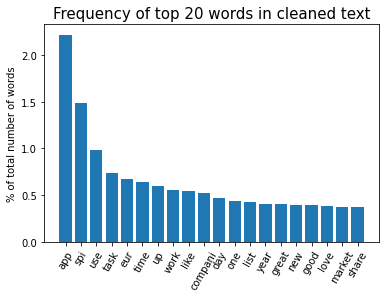

In [214]:
import random

print('\nlen(flat_all_words) = ',len(flat_all_words))

counter_obj = Counter(flat_all_words)
comm = counter_obj.most_common(20)

#print('\nlen(comm) = ',len(comm))

plt.figure(1)
labels, ys = zip(*comm)

sm =  sum(counter_obj.values())
print('\nsum = ',sm)

fys = 100*np.asarray(ys)/float(sm)

xs = np.arange(len(labels)) 

plt.figure(1)
xs = np.arange(len(labels)) 
plt.bar(xs, fys, width=0.8, align='center')
plt.xticks(xs, labels, rotation=60);  
plt.ylabel('% of total number of words')
plt.title('Frequency of top 20 words in cleaned text',fontsize=15)
#plt.savefig('figs/freq_topwords_headlines_perc.png', bbox_inches = 'tight')

comm = counter_obj.most_common(100)
labels, ys = zip(*comm)
print('\n100 most common words : \n\n',labels)
#print('\nys = ',list(ys))

print('\n\n10 random words and their counts :\n')

comm1000 = counter_obj.most_common(1000)

for key,value in random.sample(comm1000,10):
 print('#  {0:3s} : {1:5d}'.format(key,value)) 

# Streaming tesla tweets

In [215]:
cols = ['id','date','tweet','retweet_count','favorite_count',
        'screen_name','name','verified','followers_count','friends_count',
        'source','user_url']

fname = 'streaming_tweets_save.csv'  

df2 = pd.read_csv(fname,header=None, names=cols, index_col=False)

df2.drop(columns=['id','date','name','source','user_url'], inplace=True)

df2.dropna(axis=0,how='any',inplace=True)

df2.shape

(10917, 7)

## How many of these users have "verified" accounts ?

In [216]:
df3 = df2.drop_duplicates('screen_name', keep='first')

df3.shape

(7258, 7)

### Only 152 out of 7258 have verified account !

In [217]:
sum(df3['verified'])

152

In [218]:
df3[['retweet_count','favorite_count','followers_count','friends_count']].describe()

,retweet_count,favorite_count,followers_count,friends_count
count,7258.0,7258.0,7.258000e+03,7258.000000
mean,0.0,0.0,3.357728e+04,1307.762331
std,0.0,0.0,8.647023e+05,10569.662489
min,0.0,0.0,0.000000e+00,0.000000
25%,0.0,0.0,4.800000e+01,75.000000
50%,0.0,0.0,2.850000e+02,262.000000
75%,0.0,0.0,1.208000e+03,737.000000
max,0.0,0.0,4.848011e+07,596155.000000


### HIstogram of number of followers and friends. The number below 1000 is not shown.

In [219]:
print(sum(df3['followers_count']<=1000))
print(sum(df3['friends_count']<=1000))

5236
5908


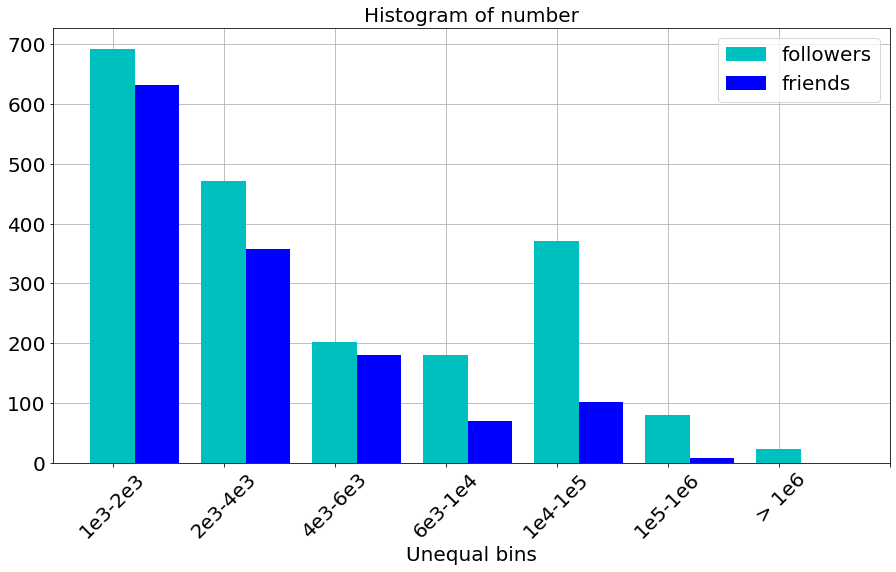

In [220]:
import numpy as np
import matplotlib.pyplot as plt

bins = [1e3,2000,4000,6000,1e4,1e5,1e6,1e8] # your bins
binslab = ['1e3-2e3','2e3-4e3','4e3-6e3','6e3-1e4','1e4-1e5','1e5-1e6',' > 1e6',''] 
data1 = df3['followers_count'].to_numpy()
data2 = df3['friends_count'].to_numpy()

hist1, edgs1 = np.histogram(data1,bins) # make the histogram
hist2, edgs2 = np.histogram(data2,bins)

hd=[]
fig,ax = plt.subplots(figsize=(15,8))
h1=ax.bar(np.arange(len(hist1)),hist1,width=0.4,color='c'); hd.append(h1)
h1=ax.bar(np.arange(len(hist2))+0.4,hist2,width=0.4,color='b'); hd.append(h1)
plt.legend(hd,['followers','friends'],fontsize=20)
plt.grid(True)
ax.set_axisbelow(True)
plt.xticks(np.arange(len(edgs)),binslab,rotation=45,fontsize=20)
plt.title('Histogram of number',fontsize=20)
#plt.ylim(0,80)
plt.yticks(range(0,800,100),fontsize=20)
plt.xlabel('Unequal bins',fontsize=20)

plt.show()


### The number of followers per user is much higher for verified users. Similar for number of friends.

In [221]:
dfverif = df3[df3['verified']]

nr = dfverif.shape[0]

print('\n# verified users = ',nr)

foll_per_user = sum(dfverif['followers_count']) / nr
print('\nfoll_per_user   = {:10.0f}'.format(foll_per_user))

friends_per_user = sum(dfverif['friends_count']) / nr
print('\nfriends_per_user = {:10.0f}'.format(friends_per_user))


# verified users =  152

foll_per_user   =    1453196

friends_per_user =      10641


In [222]:
dfnverif = df3[~df3['verified']]

nr = dfnverif.shape[0]

print('\n# not verified users = ',nr)

foll_per_user = sum(dfnverif['followers_count']) / nr
print('\nfoll_per_user   = {:10.0f}'.format(foll_per_user))

friends_per_user = sum(dfnverif['friends_count']) / nr
print('\nfriends_per_user = {:10.0f}'.format(friends_per_user))


# not verified users =  7106

foll_per_user   =       3211

friends_per_user =       1108


### The verified accounts are mostly of celebrities and media houses. Hence they tend to have huge number of followers.

In [223]:
dfasc = dfverif.sort_values('followers_count',axis=0,ascending=False,inplace=False)

In [224]:
for indx,rw in dfasc[0:10].iterrows():
  print('{0:13d} {1:8d} {2:} {3:s}'.format(rw['followers_count'],rw['friends_count'],rw['verified'],rw['screen_name']))  

     48480108      902 True nytimes
     41098020      102 True elonmusk
     22816929     1130 True Reuters
     18372595      992 True WSJ
     16476553     5220 True Forbes
      9664741     2745 True mashable
      6848611     1298 True business
      4553626      410 True CNNnews18
      3835571      200 True MarketWatch
      3534960     1455 True Entrepreneur
